### About the Dataset:

The dataset cointains various variables about car.
Based on which the selling price of the car has to be predicted.
Dataset contains 301 entries and 9 rows

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

Loading the data from csv file to pandas dataframe

In [5]:
car_dataset = pd.read_csv("Desktop/MY DATASETS/car_data.csv")

Inspecting the first 5 rows of the dataframe

In [7]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


checking the number of rows and columns

In [8]:
car_dataset.shape

(301, 9)

Knowing the information about the dataframe

In [9]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Checking the missing values

In [10]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Checking the distribution of categorical data

In [11]:
print(car_dataset.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [12]:
print(car_dataset.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [13]:
print(car_dataset.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


Value counts of top 10 selling cars

In [14]:
car_dataset.Car_Name.value_counts().head(10)

city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
innova            9
i20               9
grand i10         8
jazz              7
Name: Car_Name, dtype: int64

Visualizing the top 10 most sold cars

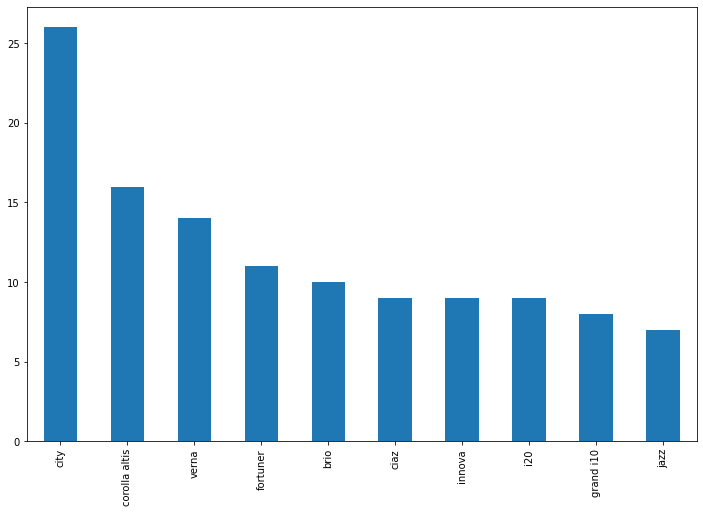

In [15]:
plt.figure(figsize=(12,8))
car_dataset.Car_Name.value_counts().head(10).plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'Seller Type')

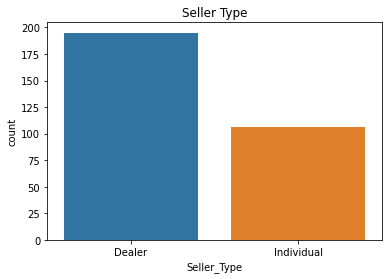

In [16]:
#Seller Type
sns.countplot(x='Seller_Type', data=car_dataset)
plt.title('Seller Type')

Text(0.5, 1.0, 'Engine Transmission')

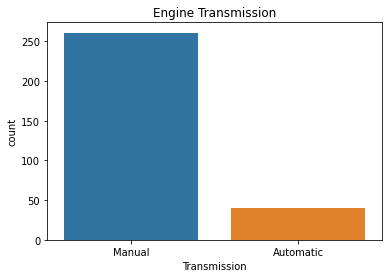

In [17]:
#Engine Transmission
sns.countplot(x='Transmission', data=car_dataset)
plt.title('Engine Transmission')

Text(0.5, 1.0, 'Transmission-fuel')

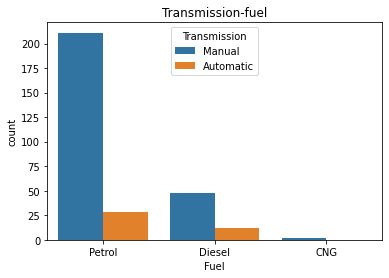

In [18]:
#Transmission-fuel
sns.countplot(x='Fuel_Type', data=car_dataset, hue='Transmission')
plt.xlabel('Fuel')
plt.title('Transmission-fuel')

Text(0.5, 1.0, 'Onwer Type')

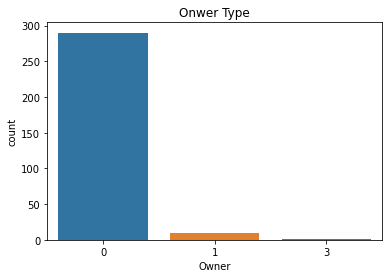

In [19]:
#ownertyoe
sns.countplot(x='Owner', data=car_dataset)
plt.xlabel('Owner')
plt.title('Onwer Type')

In [20]:
# Converting the Categorical to indicator variables in " FueL_type" column
car_dataset.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

# Converting the Categorical to indicator variables " Seller_type" column
car_dataset.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace=True)

# Converting the Categorical to indicator variables " Transmission" column
car_dataset.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace=True)

In [21]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [22]:
car_dataset["Fuel_Type"].value_counts()

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>,
        <AxesSubplot:title={'center':'Present_Price'}>],
       [<AxesSubplot:title={'center':'Kms_Driven'}>,
        <AxesSubplot:title={'center':'Fuel_Type'}>,
        <AxesSubplot:title={'center':'Seller_Type'}>],
       [<AxesSubplot:title={'center':'Transmission'}>,
        <AxesSubplot:title={'center':'Owner'}>, <AxesSubplot:>]],
      dtype=object)

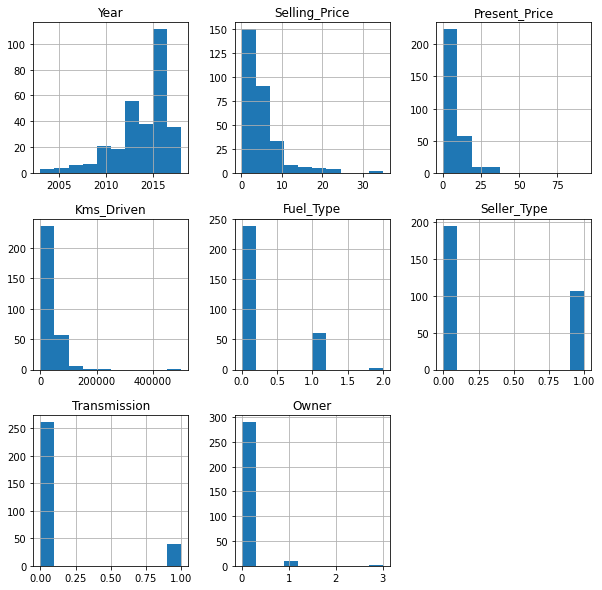

In [23]:
car_dataset.hist(figsize=(10,10))

Text(0, 0.5, 'price')

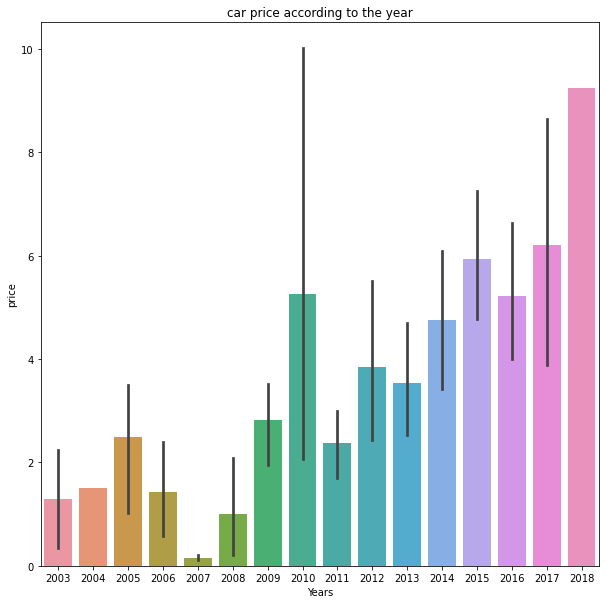

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x='Year',y='Selling_Price',data=car_dataset)
plt.title('car price according to the year')
plt.xlabel('Years')
plt.ylabel('price')


<AxesSubplot:>

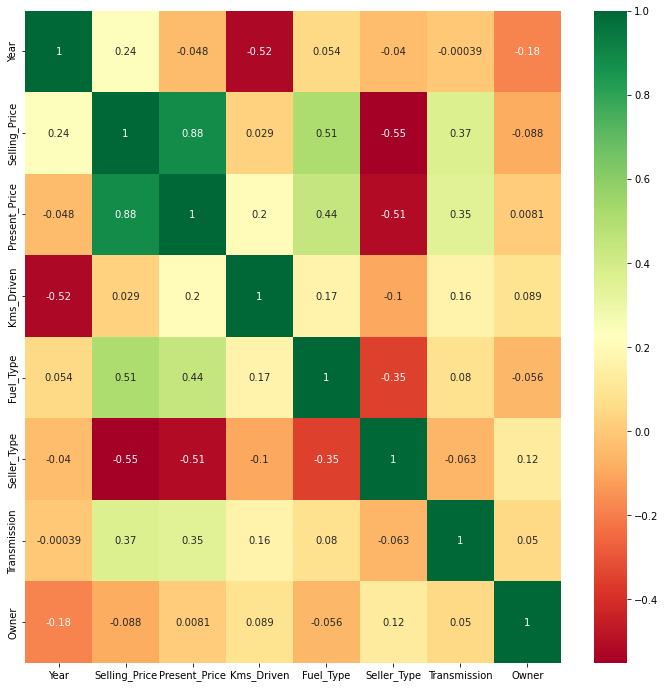

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(car_dataset.corr(),annot=True,cmap="RdYlGn")

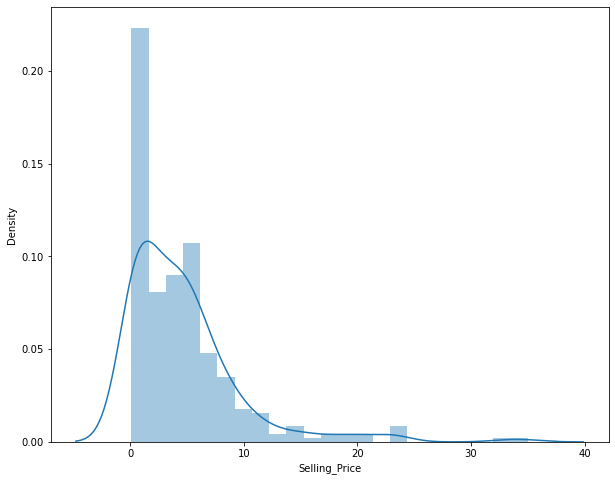

In [26]:
#Seller Type
plt.figure(figsize = (10, 8))
sns.distplot(car_dataset['Selling_Price'])
plt.show()

In [27]:
print("Skewness of Selling_Price is : {}".format(car_dataset['Selling_Price'].skew()))

Skewness of Selling_Price is : 2.493422417797524


#From the above distribution plot we can see that the Selling_Price is positive skewed and there are some error look like above 30 let's try convert it into to normal distribution 

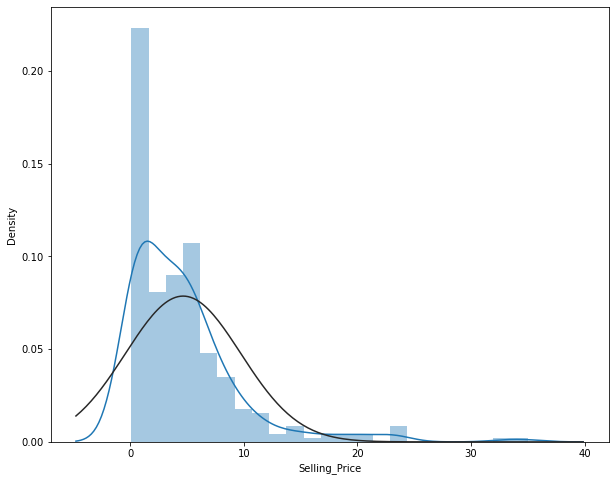

In [28]:
from scipy.stats import norm
plt.figure(figsize = (10, 8))
sns.distplot(car_dataset['Selling_Price'], fit=norm)
plt.show()

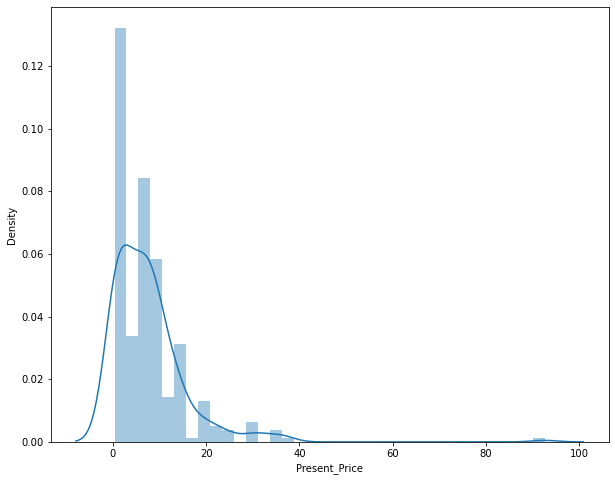

In [29]:
plt.figure(figsize = (10, 8))
sns.distplot(car_dataset['Present_Price'])
plt.show()

#Present_Price is positive skewed and there are some error look like above 30 let's try convert it into to normal distribution

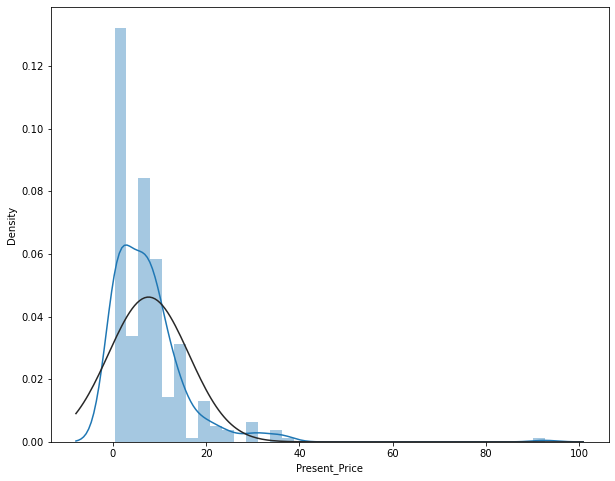

In [30]:
plt.figure(figsize = (10, 8))
sns.distplot(car_dataset['Present_Price'], fit=norm)
plt.show()

### Splitting the data and target


In [31]:
x = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = car_dataset['Selling_Price']

In [32]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [33]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


### Splitting Training and Testing data

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2) 

# Model Training


   ###    1. Linear Regresssion

In [35]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [36]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [37]:
#prediction on Training Data
training_data_prediction = lin_reg_model.predict(x_train)

In [38]:
# R squared error
error_score = metrics.r2_score(y_train,training_data_prediction)
print("R squared Error :",error_score)

R squared Error : 0.87994516604937


In [39]:
#prediction on Test Data
test_data_prediction = lin_reg_model.predict(x_test)


In [40]:
# R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared Error :",error_score)

R squared Error : 0.8365766715025409


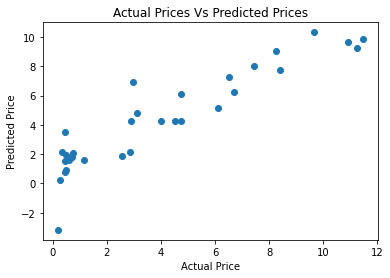

In [41]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

In [42]:
#visualise the actual price and predicted prices

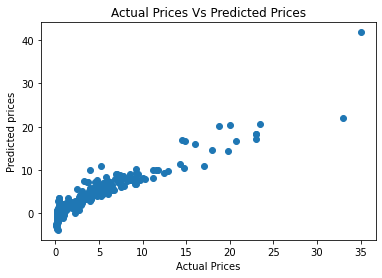

In [43]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()